## <p style="text-align: center;">B9AI109_2122_TMD3</p>
### <p style="text-align: center;"> Details </p>
#### <p style="text-align: center;">Name: Sunil Judhistira Gauda</p>
#### <p style="text-align: center;">Student ID : 10595858 </p>

## **Business Undestanding**
### Blog Gender Classification using Natural Language Processing
Identifying gender from text data using NLP and Machine Learning

### Note
* Please Uncomment the below code of nltk and complete the downloads for all the packages to use NLTK

In [39]:
import pandas as pd
from  nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import pickle as pkl

# If needed run and download NLTK Lib to run the code
# import nltk
# nltk.download()


#### Import the Data set

In [21]:
df_dict = pd.read_excel("BLOG GENDER BALANCED.xlsx", sheet_name=None)

c:\Users\sunil\miniconda3\envs\dbsenv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## **Data Undestanding**
Data Comprises of BLOG Posts and GENDER,
* BLOG : Data is the text data that we will use to identify gender
* GENDER : It is classification data, as output params fro training and test.

In [22]:
df = df_dict["Retrieve BLOG-GENDER-BALANCED"]
df.head()


,BLOG,GENDER
0,Beyond Getting There: What Travel Days Show U...,F
1,I remember so much about the island; the large...,F
2,I have had asthma and allergies my entire life...,M
3,The last few days have been an emotional rolle...,M
4,If you lined up all the teachers and staff in ...,F


## **Data Preparation**

#### Conversion of data of GENDER column to 1 and 0 as it is a binary classifcation

In [23]:
for gen in df['GENDER']:

  if gen=='M':

     df['GENDER'].replace({'M':'1'},inplace=True)

  elif gen=='F':

     df['GENDER'].replace({'F':'0'},inplace=True)

#### Drop NA columns in dataset

In [24]:
df.dropna(inplace=True)

#### Tokenize the Text Data

In [25]:
df["BLOG_Token"] = [word_tokenize(post) for post in df['BLOG'] ]

In [26]:
df.head()

,BLOG,GENDER,BLOG_Token
0,Beyond Getting There: What Travel Days Show U...,0,"[Beyond, Getting, There, :, What, Travel, Days..."
1,I remember so much about the island; the large...,0,"[I, remember, so, much, about, the, island, ;,..."
2,I have had asthma and allergies my entire life...,1,"[I, have, had, asthma, and, allergies, my, ent..."
3,The last few days have been an emotional rolle...,1,"[The, last, few, days, have, been, an, emotion..."
4,If you lined up all the teachers and staff in ...,0,"[If, you, lined, up, all, the, teachers, and, ..."


In [27]:
post_new = []
for each_row in df["BLOG_Token"]:
    post_new.append( [v for v in each_row if v.isalpha()])

In [28]:
post_new_alpha = []

stop_words = set(stopwords.words('english'))

for each_row in post_new:
    post_new_alpha.append( [sw for sw in each_row if sw not in stop_words ])

#### Using Lemmatizer to Group the words

In [29]:
desc_new_lem = []
lem = WordNetLemmatizer()
for each_row in post_new_alpha:
    desc_new_lem.append([lem.lemmatize(word) for word in each_row])

df["BLOG_Token_cleaned"] = desc_new_lem
df["BLOG_Token_cleaned"] = [" ".join(desc) for desc in df['BLOG_Token'].values]


In [30]:
df.drop(["BLOG", "BLOG_Token"], axis=1, inplace=True)


In [31]:
df.head()

,GENDER,BLOG_Token_cleaned
0,0,Beyond Getting There : What Travel Days Show U...
1,0,I remember so much about the island ; the larg...
2,1,I have had asthma and allergies my entire life...
3,1,The last few days have been an emotional rolle...
4,0,If you lined up all the teachers and staff in ...


### Vectorising

In [32]:
tfi = TfidfVectorizer(max_features=1000)
x = tfi.fit_transform(df["BLOG_Token_cleaned"]).toarray()
X = pd.DataFrame(x)


In [33]:
y = np.array(df['GENDER'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## **Modelling**

* Using Machine learning models to train and classify the Data

In [35]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## **Evaluation**

#### The Classification report provides a overview of precision and recall which will help us evaluate the model

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       252
           1       0.67      0.68      0.68       268

    accuracy                           0.67       520
   macro avg       0.67      0.66      0.66       520
weighted avg       0.67      0.67      0.67       520



#### Confusion Matrix is a good visual measure to get quick overview of the classifier

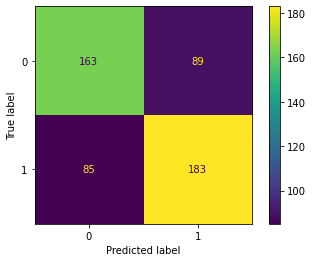

In [37]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred= y_pred);

## **Deployment**

In [41]:
clf.fit(X,y);

#### Using Pickle by Python to save the trained model to use in applications

In [42]:
pkl.dump(clf, open("clfModel.pkl", 'wb'))

#### We can load the model using pickle and use it in application

NOTE : 
Data needs to be cleaned, tokenized and vectorized before it is fead to model.

In [46]:
clf_model = pkl.load(open("clfModel.pkl", 'rb'));